In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.models import vgg13
from sklearn.model_selection import train_test_split
import torchvision

In [ ]:
# os.getcwd()
# os.chdir("C:/Users/abrar/OneDrive/Desktop/DL_Alina/part_2_cnn_dataset (1)")

In [15]:
# Define function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        images.append(np.array(img))
    return np.array(images)

In [16]:
# Load images
dogs_images = load_images_from_folder('/Users/mahesh/Downloads/part_2_cnn_dataset (1)/dogs')
food_images = load_images_from_folder('/Users/mahesh/Downloads/part_2_cnn_dataset (1)/food')
vehicle_images = load_images_from_folder('/Users/mahesh/Downloads/part_2_cnn_dataset (1)/vehicles')


In [18]:
# Define the transformations
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
data=torchvision.datasets.ImageFolder(root='/Users/mahesh/Downloads/part_2_cnn_dataset (1)',transform=transform)
data

Dataset ImageFolder
    Number of datapoints: 30000
    Root location: /Users/mahesh/Downloads/part_2_cnn_dataset (1)
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

no of classes: ['dogs', 'food', 'vehicles']
no of unique features: 3
label counts: Counter({0: 10000, 1: 10000, 2: 10000})


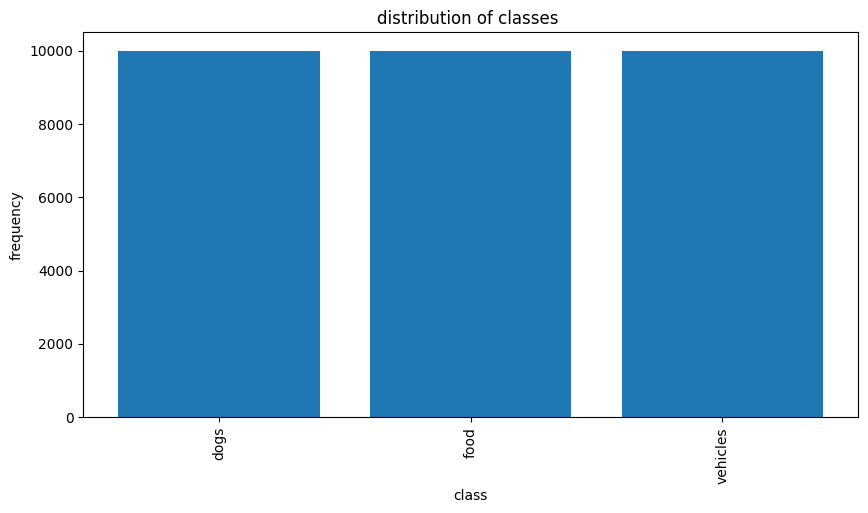

images : 30000


In [19]:
from collections import Counter
classes=data.classes
print("no of classes:",classes)
ft_unique=len(classes)
print("no of unique features:",ft_unique)
label=Counter(data.targets)
print("label counts:",label)
plt.figure(figsize=(10, 5))
plt.bar(classes, label.values())
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('distribution of classes ')
plt.xticks(rotation=90)
plt.show()
print(f'images : {len(data)}')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4831376].


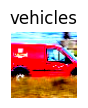

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..2.64].


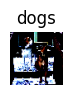

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..2.2489083].


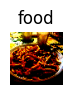

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].


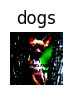

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


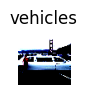

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].


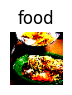

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.3959913].


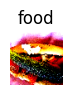

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8431373..1.7694151].


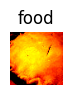

In [20]:
from ast import Index
import random
def imshow(img, title):
    image = img.numpy().transpose((1, 2, 0))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


plt.figure(figsize=(8, 5))
for i in range(8):
    index = random.randint(0, len(data) - 1)
    image, label = data[index]
    plt.subplot(1, 8, i+1)
    imshow(image, title=classes[label])

plt.show()

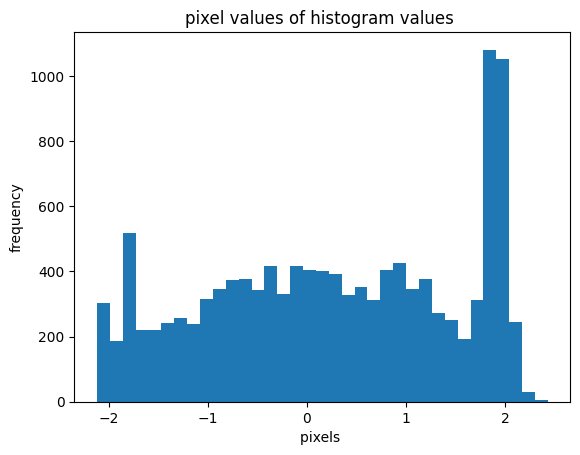

In [21]:
import random
index = random.randint(0, len(data) - 1)
image, _ = data[index]
pix = image.flatten().numpy()
plt.hist(pix, bins=35)
plt.title('pixel values of histogram values ')
plt.xlabel('pixels ')
plt.ylabel('frequency')
plt.show()

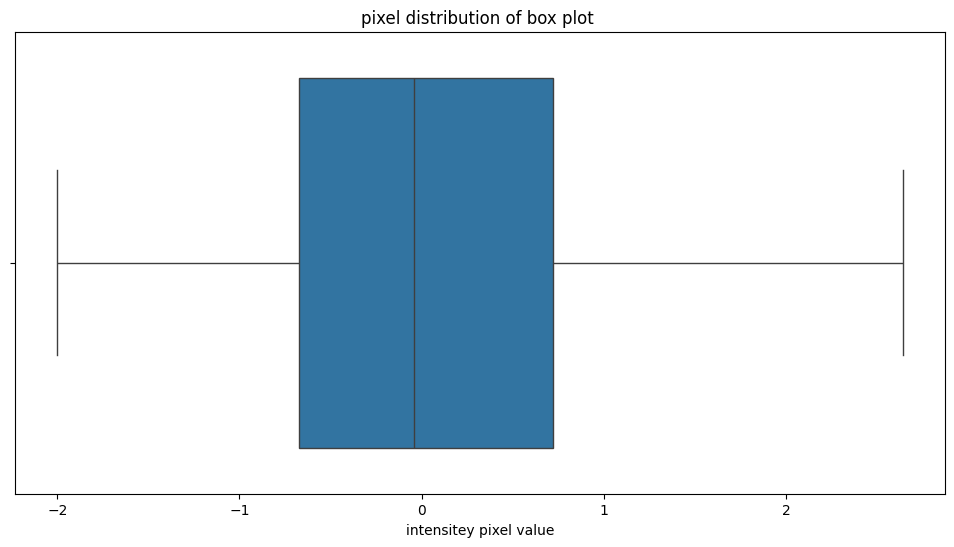

In [22]:
import seaborn as sbn
import matplotlib.pyplot as plt

rand_img, _ = data[10]
random_image = rand_img.permute(1, 2, 0).numpy()
pixel_values = random_image.ravel()

plt.figure(figsize=(12, 6))
sbn.boxplot(x=pixel_values)
plt.xlabel("intensitey pixel value")
plt.title("pixel distribution of box plot ")
plt.show()


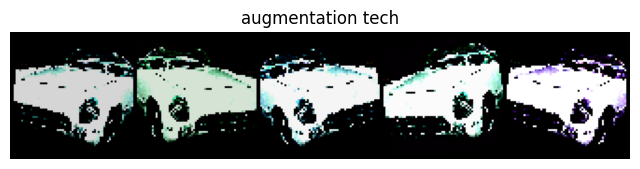

In [23]:
import torch
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

transformss = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.RandomRotation(10),transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)])

random_image, _ = data[29500]
image_augmented = [transformss(random_image) for _ in range(5)]
img_grid = make_grid(image_augmented, nrow=5)

plt.figure(figsize=(8, 5))
plt.imshow(img_grid.permute(1, 2, 0).numpy())
plt.axis('off')
plt.title("augmentation tech")
plt.show()


In [5]:
# Combine images and create labels
all_images = np.concatenate((dogs_images, food_images, vehicle_images), axis=0)
labels = np.concatenate((np.zeros(len(dogs_images)), np.ones(len(food_images)), np.ones(len(vehicle_images))*2))


In [6]:
# Split the dataset into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(all_images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [7]:
# Apply transformations to the images
train_images = torch.stack([transform(Image.fromarray(image)) for image in train_images])
val_images = torch.stack([transform(Image.fromarray(image)) for image in val_images])
test_images = torch.stack([transform(Image.fromarray(image)) for image in test_images])


In [8]:
# Convert labels to tensors
train_labels = torch.from_numpy(train_labels).long()
val_labels = torch.from_numpy(val_labels).long()
test_labels = torch.from_numpy(test_labels).long()


In [9]:
# Create dataset objects
train_dataset = TensorDataset(train_images, train_labels)
val_dataset = TensorDataset(val_images, val_labels)
test_dataset = TensorDataset(test_images, test_labels)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [10]:
# Define the VGG13 (Version B) model architecture
class VGG13(nn.Module):
    def __init__(self, num_classes):
        super(VGG13, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [11]:
# Create an instance of the VGG13 model
num_classes = 3
model = VGG13(num_classes)

In [12]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [13]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

In [16]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

In [17]:
best_val_loss = float('inf')
patience = 5
early_stopping_counter = 0
epochs = 5
train_acc_values = []
val_acc_values = []
train_loss_values = []
val_loss_values = []
model =model.to(device)
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs.to(device)).to(device)

        loss = criterion(outputs.to(device), labels.to(device))


        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += 1e-5 * l2_reg

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs.to(device)).to(device)

            loss = criterion(outputs.to(device), labels.to(device))
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'cnn_model.pth')
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("stop the model if early triggering was occured .")
        break

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
    train_acc_values.append(train_accuracy)
    val_acc_values.append(val_accuracy)
    train_loss_values.append(train_loss)
    val_loss_values.append(val_loss)

Epoch [1/5], Train Loss: 0.3408, Train Acc: 0.8809, Val Loss: 0.3473, Val Acc: 0.8758
Epoch [2/5], Train Loss: 0.3174, Train Acc: 0.8894, Val Loss: 0.3303, Val Acc: 0.8865
Epoch [3/5], Train Loss: 0.2904, Train Acc: 0.8994, Val Loss: 0.3004, Val Acc: 0.8919
Epoch [4/5], Train Loss: 0.2735, Train Acc: 0.9065, Val Loss: 0.2827, Val Acc: 0.9010
Epoch [5/5], Train Loss: 0.2683, Train Acc: 0.9094, Val Loss: 0.2964, Val Acc: 0.8952


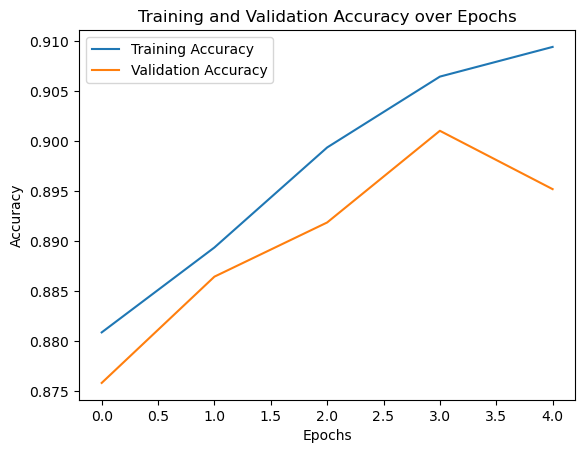

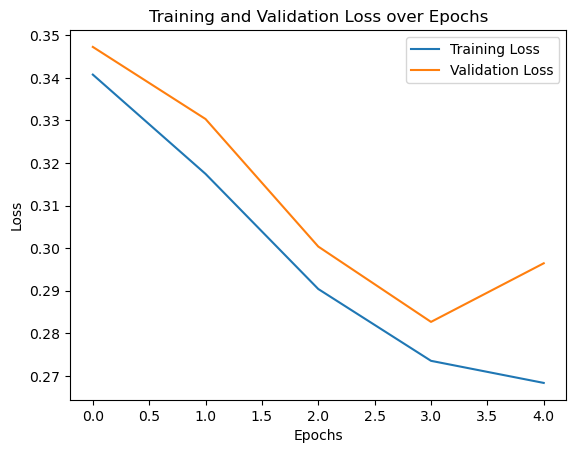

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
best_model = VGG13(num_classes)

best_model.load_state_dict(torch.load('cnn_model.pth'))
best_model = best_model.to(device)
test_loss = 0.0
predictions = []
targets = []

best_model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        targets.extend(labels.tolist())

test_accuracy = accuracy_score(targets, predictions)
test_loss /= len(test_loader)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9098, Test Loss: 0.2679


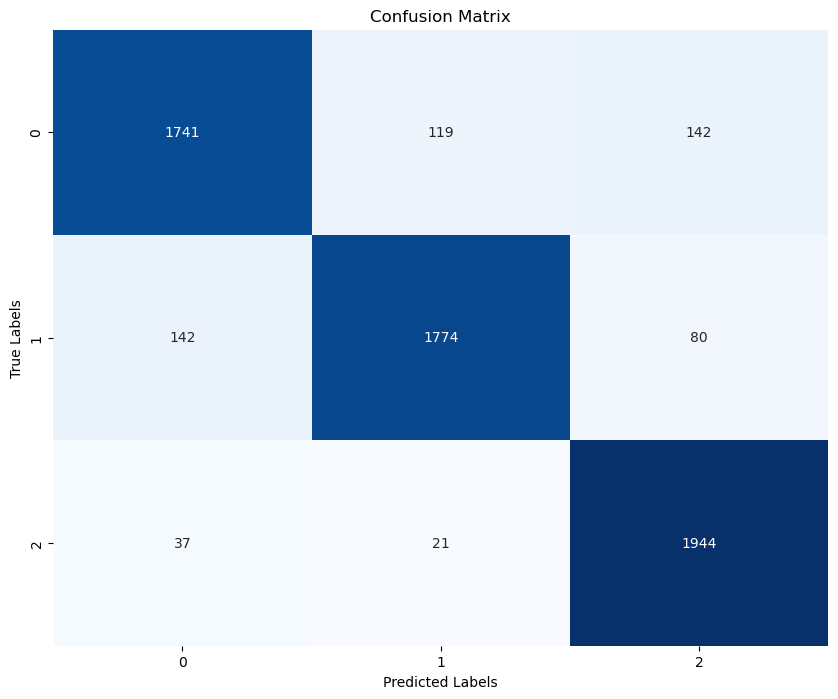

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(targets, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(targets, predictions, average='macro')
recall = recall_score(targets, predictions, average='macro')
f1 = f1_score(targets, predictions, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9103775043273502
Recall: 0.9098122985898538
F1 Score: 0.9093502391862823
